# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>

In this sixth notebook our goal is to complete the code available on the Ariel website in order to simulate 1D Ising model. In particular, we want to add the Metropolis sampling algorithm and the Gibbs sampling algorithm to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$ enabling also the possibility to restart from a previous spin configuration.
We estimate four different physical quantities like $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and we show the pictures of their estimations and the relative uncertainties, compared with the exact curves.

As we said, we want to make a simulation of a 1D Ising model, i.e. a series of spins that can flip and assume two values: "up" or "down".
The advantage in doing this is that in Statistical Mechanics this model is exactly resoluble. Assuming $\mu_B=1$ and $k_B=1$, we have that the Hamiltonian for a system of N spins with nearest neighbors interaction is given by:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$ (Periodic Boundary Conditions).

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$. In our case $N=50$ and $J = 1$.

In this fashion, resorting to the definition of the Helmholtz free energy $A = -k_B T \ln Z$, we can deduce all the thermodynamic quantities of interest.

Every physical quantity that we measure and estimate is also calculated theorically. In this notebook we present the work firstly defining the analytic solution of the 1D Ising model and then showing the estimation of the quantity of interest. 
Furthermore, a Monte Carlo step consists in trying to flip one time all the spins of the system. 
Before the simulation we equilibrate the system. Finally we use the blocking method to estimate the quantities and the relative uncertainties.

### Internal Energy per spin (with $ h = 0$)

As we said the first operation we do is to equilibrate the system. The reason why we do so, is that the methods we use (Metropolis and Gibbs samplings) grant that the distribution that we want to sample is reached in the limit. For this reason, we add a parameter in the file "input.dat" to set the equilibration steps that allow us to reach the equilibrium of the system. In this case, to be sure, we make the program to do $2000$ equilibration steps. 
As far as the blocking method is concerned, we use $100$ blocks made of $10000$ steps each. We run the program $17$ times in order to cover the interval of temperatures $[0.5, 2.0]$ with increment $\Delta T = 0.1$.
These information are not related only to the computation of the internal energy, but to all the quantities of interest.

The **Internal Energy** per spin (with $h=0$) is:

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

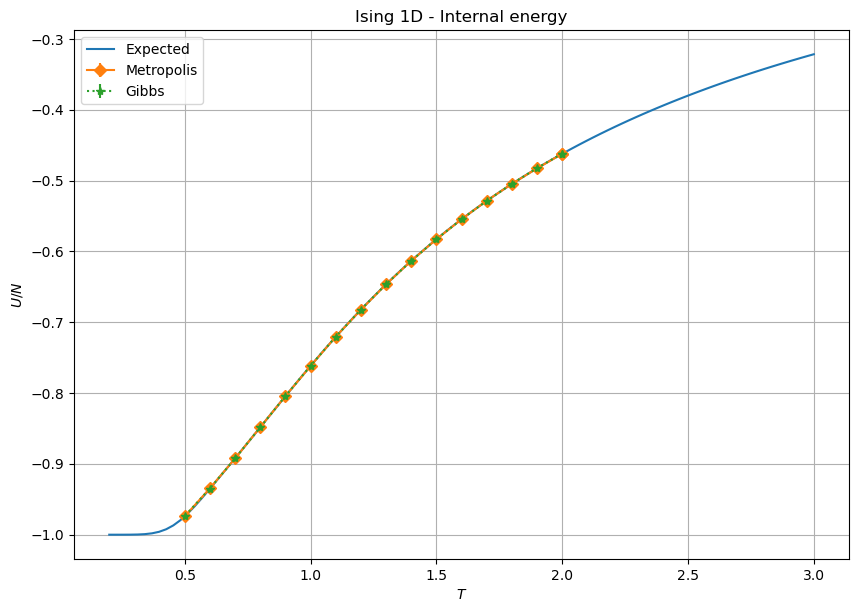

In [1]:
import numpy as np
import matplotlib.pyplot as plt


T_met, u_met, err_u_met=np.loadtxt("data/metropolis/results.dat", usecols=(0,3,4), dtype="float,float,float", unpack=True)
T_gib, u_gib, err_u_gib=np.loadtxt("data/gibbs/results.dat", usecols=(0,3,4), dtype="float,float,float", unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.figure(figsize=(10,7), dpi=100)

plt.plot(T, e, label="Expected")
plt.errorbar(T_met, u_met, yerr=err_u_met, linestyle="solid", marker="D",label="Metropolis")
plt.errorbar(T_gib, u_gib, yerr=err_u_gib, linestyle="dotted", marker='*', label="Gibbs")
plt.title("Ising 1D - Internal energy")
plt.xlabel(r"$T$")
plt.ylabel(r"$U/N$")
plt.grid(True)
plt.legend()

plt.show()



We can observe that the results are in agreement with the theory.

### Heat Capacity per spin (with $h=0$)

In order to calculate the heat capacity $C$ we have to resort to a measure of the quadratic fluctuations of the energy; indeed: 
$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = 
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$
For the expecetd curve, we use:
$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$ 

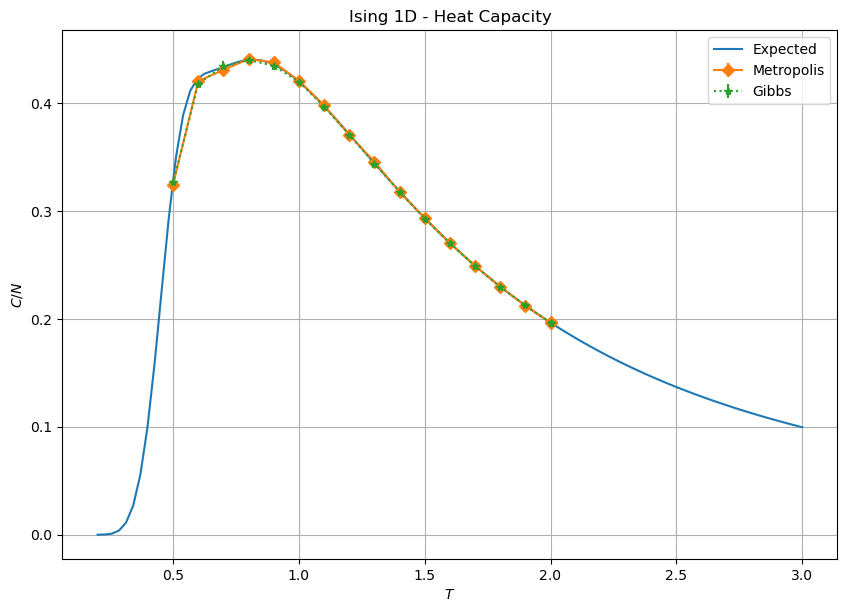

In [2]:
T_met, C_met, err_C_met=np.loadtxt("data/metropolis/results.dat", usecols=(0,7,8), dtype="float,float,float", unpack=True)
T_gib, C_gib, err_C_gib=np.loadtxt("data/gibbs/results.dat", usecols=(0,7,8), dtype="float,float,float", unpack=True)


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.figure(figsize=(10,7), dpi=100)

plt.plot(T, heat, label="Expected")
plt.errorbar(T_met, C_met, yerr=err_C_met, linestyle="solid", marker="D", label="Metropolis")
plt.errorbar(T_gib, C_gib, yerr=err_C_gib, linestyle="dotted", marker="*", label="Gibbs")
plt.title("Ising 1D - Heat Capacity")
plt.xlabel(r"$T$")
plt.ylabel(r"$C/N$")
plt.grid(True)
plt.legend()
    
plt.show()

Also in this case the results are in agreeement with the theory. We can just observe little discrepancies for low temperatures.

### Magnetization (with $h \neq$ 0)

In order to calculate the Magnetization we have to put a field $a\neq 0$; in fact, with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.
In particular, the magnetization can be computed as:

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

In this case we consider $h= 0.02$.

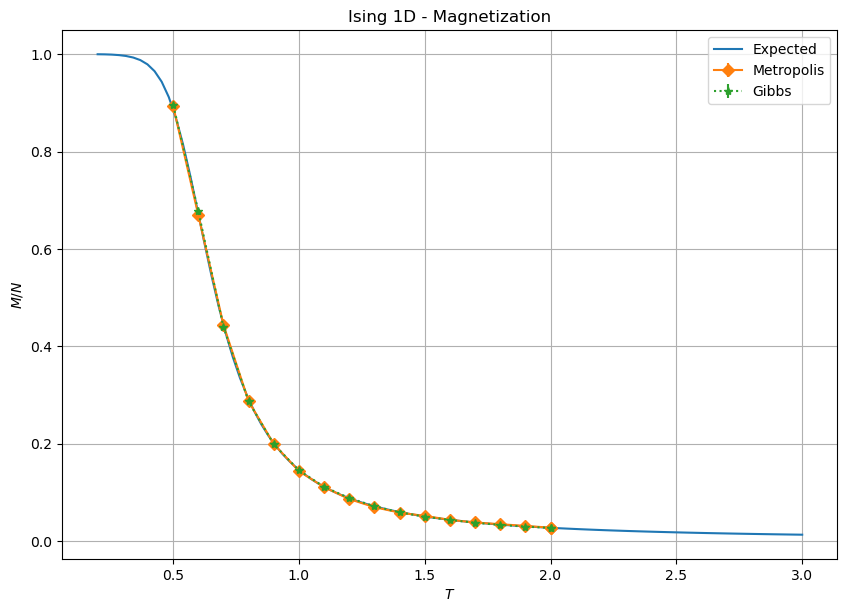

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


T_met, M_met, err_M_met=np.loadtxt("data/metropolis_field/results.dat", usecols=(0,5,6), dtype="float,float,float", unpack=True)
T_gib, M_gib, err_M_gib=np.loadtxt("data/gibbs_field/results.dat", usecols=(0,5,6), dtype="float,float,float", unpack=True)

plt.figure(figsize=(10,7), dpi=100)

plt.plot(T, M, label="Expected")
plt.errorbar(T_met, M_met, yerr=err_M_met, linestyle="solid", marker="D", label="Metropolis")
plt.errorbar(T_gib, M_gib, yerr=err_M_gib, linestyle="dotted", marker="*", label="Gibbs")
plt.title("Ising 1D - Magnetization")
plt.xlabel(r"$T$")
plt.ylabel(r"$M/N$")
plt.grid(True)
plt.legend()
    
plt.show()

The estimated values are in agreement with the theory.

### Magnetic susceptibility (with $h=0$)

Also for the computation of the Magnetic susceptibility we can resort to the evaluation of a quadratic fluctuation. This observation and the one about heat capacity are fundamental since we can not make instantaneous calculations of these two quantities. In fact, in order to calculate $C$ we can just calculate the variance of the Hamiltonian and to calculate $\chi$ we can just calculate the variance of the sum of spin $\sum_{i=1,N}s_i$. We have to underline the second-last passage in the relation: we are looking for the Magnetic susceptivity with $h=0$. This means that $\left\langle \sum_{i=1,N}s_i \right\rangle = 0$ and we can compute $\chi$ as $\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] $. $$$$


$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} 
=\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] 
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

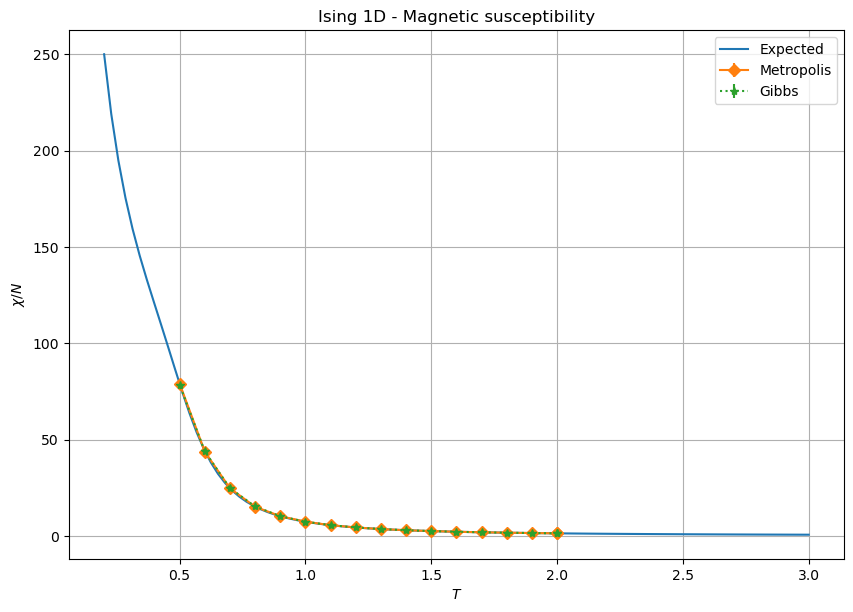

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

T_met, CH_met, err_CH_met=np.loadtxt("data/metropolis/results.dat", usecols=(0,9,10), dtype="float,float,float", unpack=True)
T_gib, CH_gib, err_CH_gib=np.loadtxt("data/gibbs/results.dat", usecols=(0,9,10), dtype="float,float,float", unpack=True)

plt.figure(figsize=(10,7), dpi=100)

plt.plot(T, X, label="Expected")
plt.errorbar(T_met, CH_met, yerr=err_CH_met, linestyle="solid", marker="D", label="Metropolis")
plt.errorbar(T_gib, CH_gib, yerr=err_CH_gib, linestyle="dotted", marker="*", label="Gibbs")
plt.title("Ising 1D - Magnetic susceptibility")
plt.xlabel(r"$T$")
plt.ylabel(r"$\chi/N$")
plt.grid(True)
plt.legend()
    
plt.show()

Finally, also for the magnetic susceptibility the values are in agreement with the theory. 